In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# File path
DATA_PATH = r"D:\@kaim\insurance-analytics-kaim-week3\data\raw\MachineLearningRating_v3.txt"

# Load data
df = pd.read_csv(DATA_PATH, sep='|', low_memory=False)

In [5]:
output_dir = r"..\figures"

📉 Correlation Matrix of Numerical Features


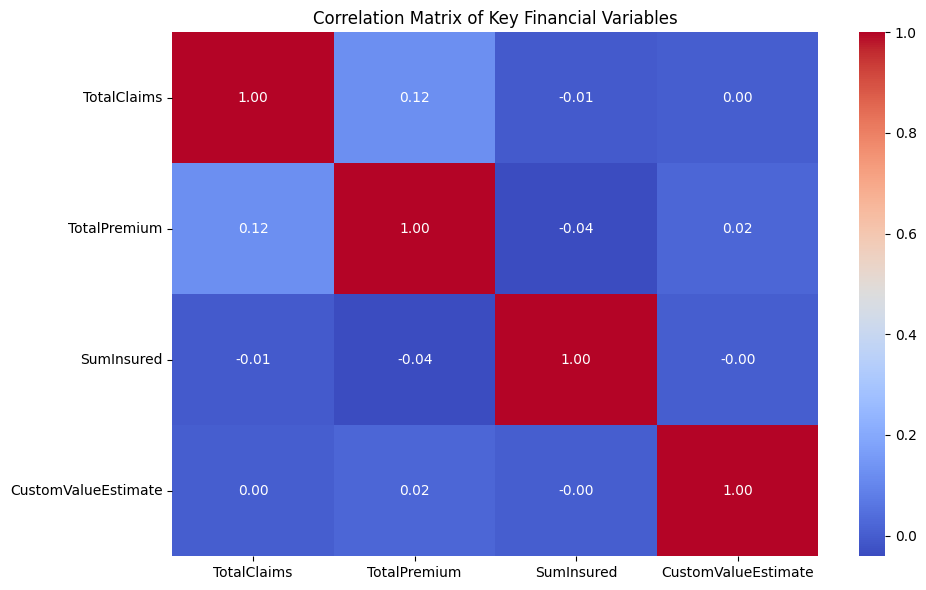

In [21]:
# Selecting relevant numerical features
num_features = ["TotalClaims", "TotalPremium", "SumInsured", "CustomValueEstimate"]
corr = df[num_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Financial Variables")
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_matrix.png")
plt.show()


🗺️ Postal Code vs Total Premium & Claims (Scatter)



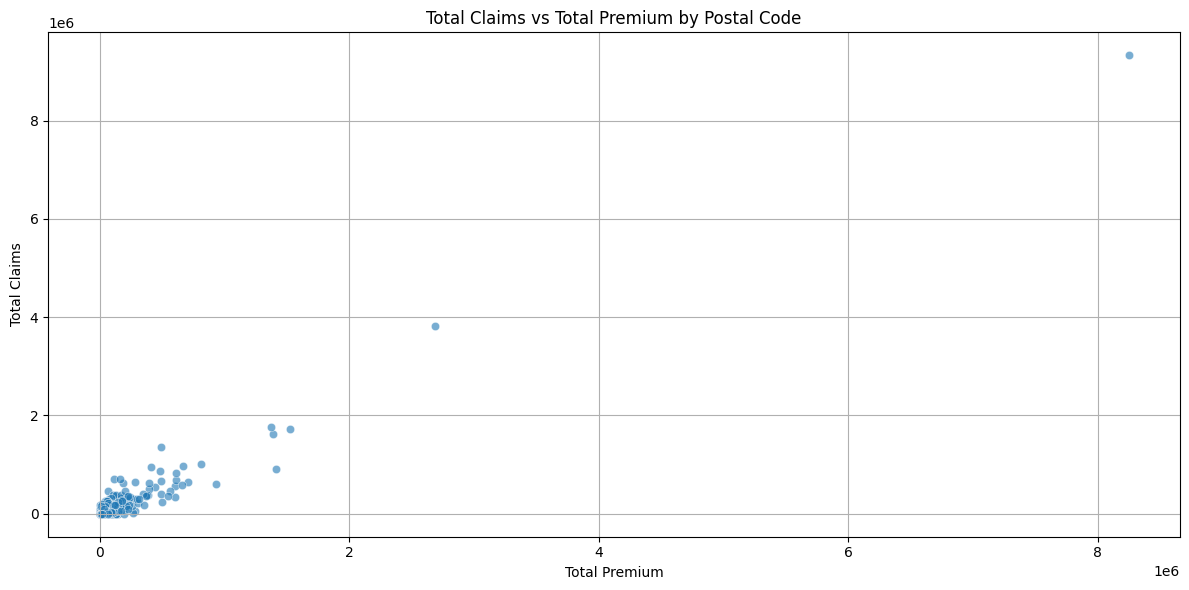

In [8]:
agg_zip = df.groupby("PostalCode")[["TotalPremium", "TotalClaims"]].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=agg_zip, x="TotalPremium", y="TotalClaims", alpha=0.6)
plt.title("Total Claims vs Total Premium by Postal Code")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/total_claims_vs_total_premium_by_postal_code.png")
plt.show()


🗓️ Monthly Trends in Premium and Claims

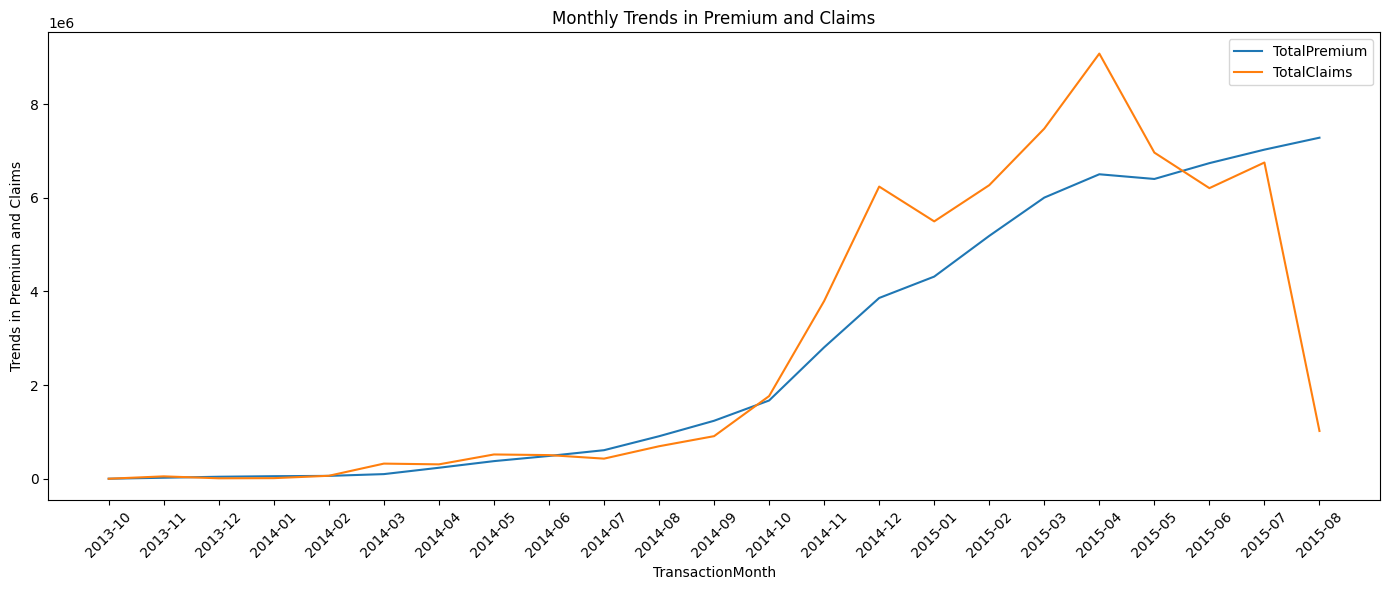

In [23]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')
monthly_agg = df.groupby(df["TransactionMonth"].dt.to_period("M"))[["TotalPremium", "TotalClaims"]].sum().reset_index()
monthly_agg["TransactionMonth"] = monthly_agg["TransactionMonth"].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_agg, x="TransactionMonth", y="TotalPremium", label="TotalPremium")
sns.lineplot(data=monthly_agg, x="TransactionMonth", y="TotalClaims", label="TotalClaims")
plt.xticks(rotation=45)
plt.title("Monthly Trends in Premium and Claims")
plt.ylabel("Trends in Premium and Claims")
plt.tight_layout()
plt.legend()
plt.savefig(f"{output_dir}/monthly_trends_in_premium_and_claims.png")
plt.show()


🌍 Province-wise Comparison

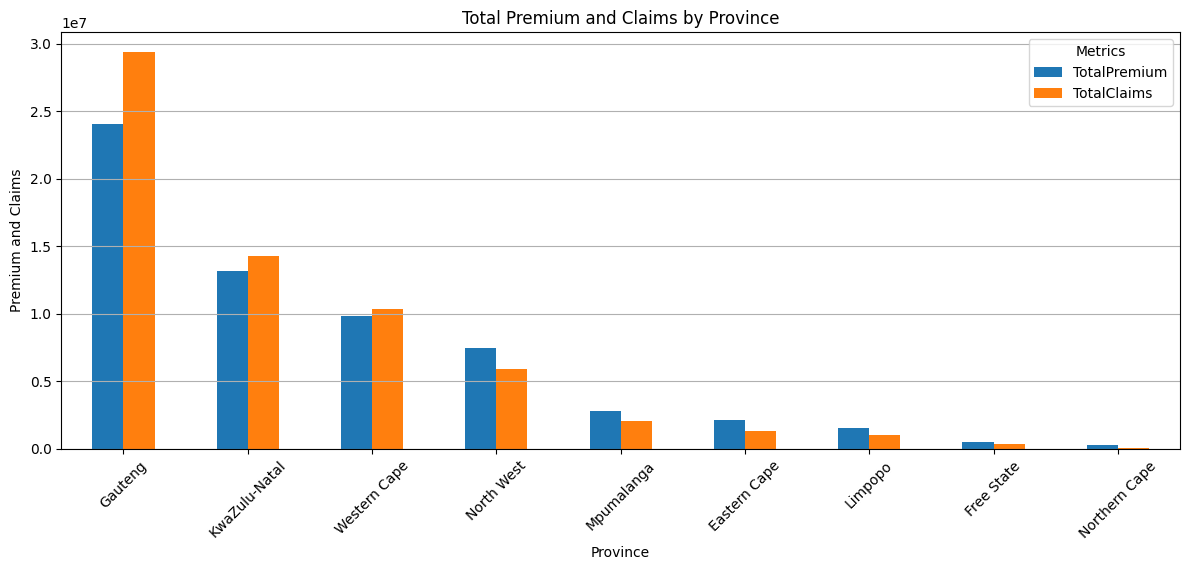

In [24]:
province_agg = df.groupby("Province")[["TotalPremium", "TotalClaims"]].sum().sort_values("TotalPremium", ascending=False)

province_agg.plot(kind='bar', figsize=(12, 6))
plt.title("Total Premium and Claims by Province")
plt.ylabel("Premium and Claims")
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.savefig(f"{output_dir}/total_premium_and_claims_by_province.png")
plt.show()


🚗 Vehicle Make vs Average Claims

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_2672\967452953.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=make_agg.index, x=make_agg["TotalClaims"], palette="viridis")


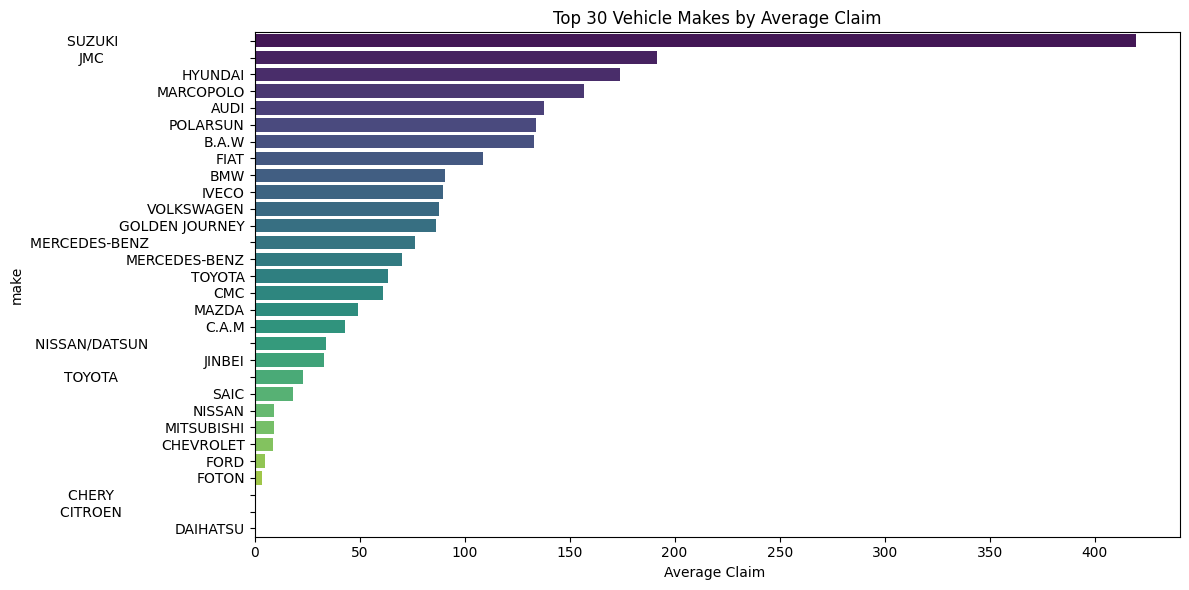

In [ ]:
make_agg = df.groupby("make")[["TotalClaims"]].mean().sort_values("TotalClaims", ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(y=make_agg.index, x=make_agg["TotalClaims"], palette="viridis")
plt.title("Top 30 Vehicle Makes by Average Claim")
plt.xlabel("Average Claim ")
plt.tight_layout()
plt.savefig(f"{output_dir}/top_30_vehicle_makes_by_average_claim.png")
plt.show()


C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_2672\1891473800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=make_agg.index, x=make_agg["TotalClaims"], palette="viridis")


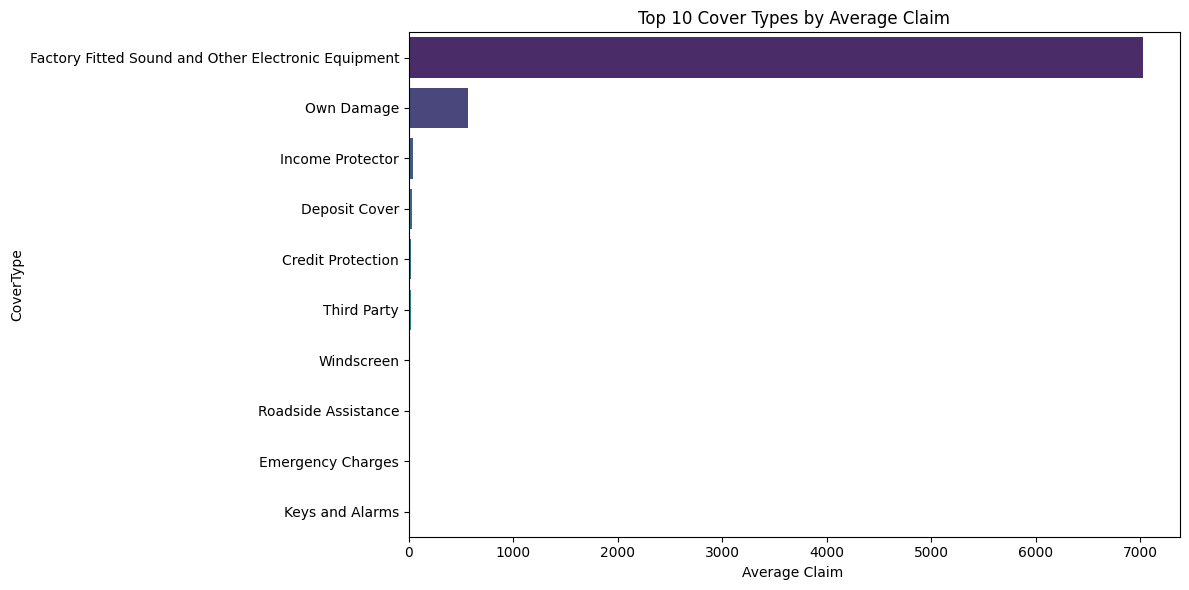

In [33]:
# Vehicle CoverType vs Total Claims
make_agg = df.groupby("CoverType")[["TotalClaims"]].mean().sort_values("TotalClaims", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=make_agg.index, x=make_agg["TotalClaims"], palette="viridis")
plt.title("Top 10 Cover Types by Average Claim")
plt.xlabel("Average Claim ")
plt.tight_layout()
plt.savefig(f"{output_dir}/top_10_cover_types_by_average_claim.png")
plt.show()
